In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from IPython.display import Image
import seaborn as sns
import re
import dateutil.parser
import pandas as pd
import random

# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV


%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/nikolaithomas/sf16_ds4/master/challenges/03-linear_splitting/2013_movies.csv?token=AT_fvKJhzxVf3Tt8UrQ3YjLKAZFiZmCDks5YGyT_wA%3D%3D')
df

/Users/nicholasthomas/Desktop/Coding.Local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/nicholasthomas/Desktop/Coding.Local/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,10/4/13 0:00
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,6/21/13 0:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,12/13/13 0:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,5/24/13 0:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,3/8/13 0:00


# Challenge 3

## 3.1

In [2]:
df2 = df.drop(['Title', 'Budget', 'Director','Rating','Runtime','ReleaseDate'], axis=1, errors ="ignore")
df2['Number'] = 1

In [3]:
df2.head()

,DomesticTotalGross,Number
0,424668047,1
1,409013994,1
2,400738009,1
3,368061265,1
4,291045518,1


In [4]:
df2.corr()

,DomesticTotalGross,Number
DomesticTotalGross,1.0,NaN
Number,NaN,NaN


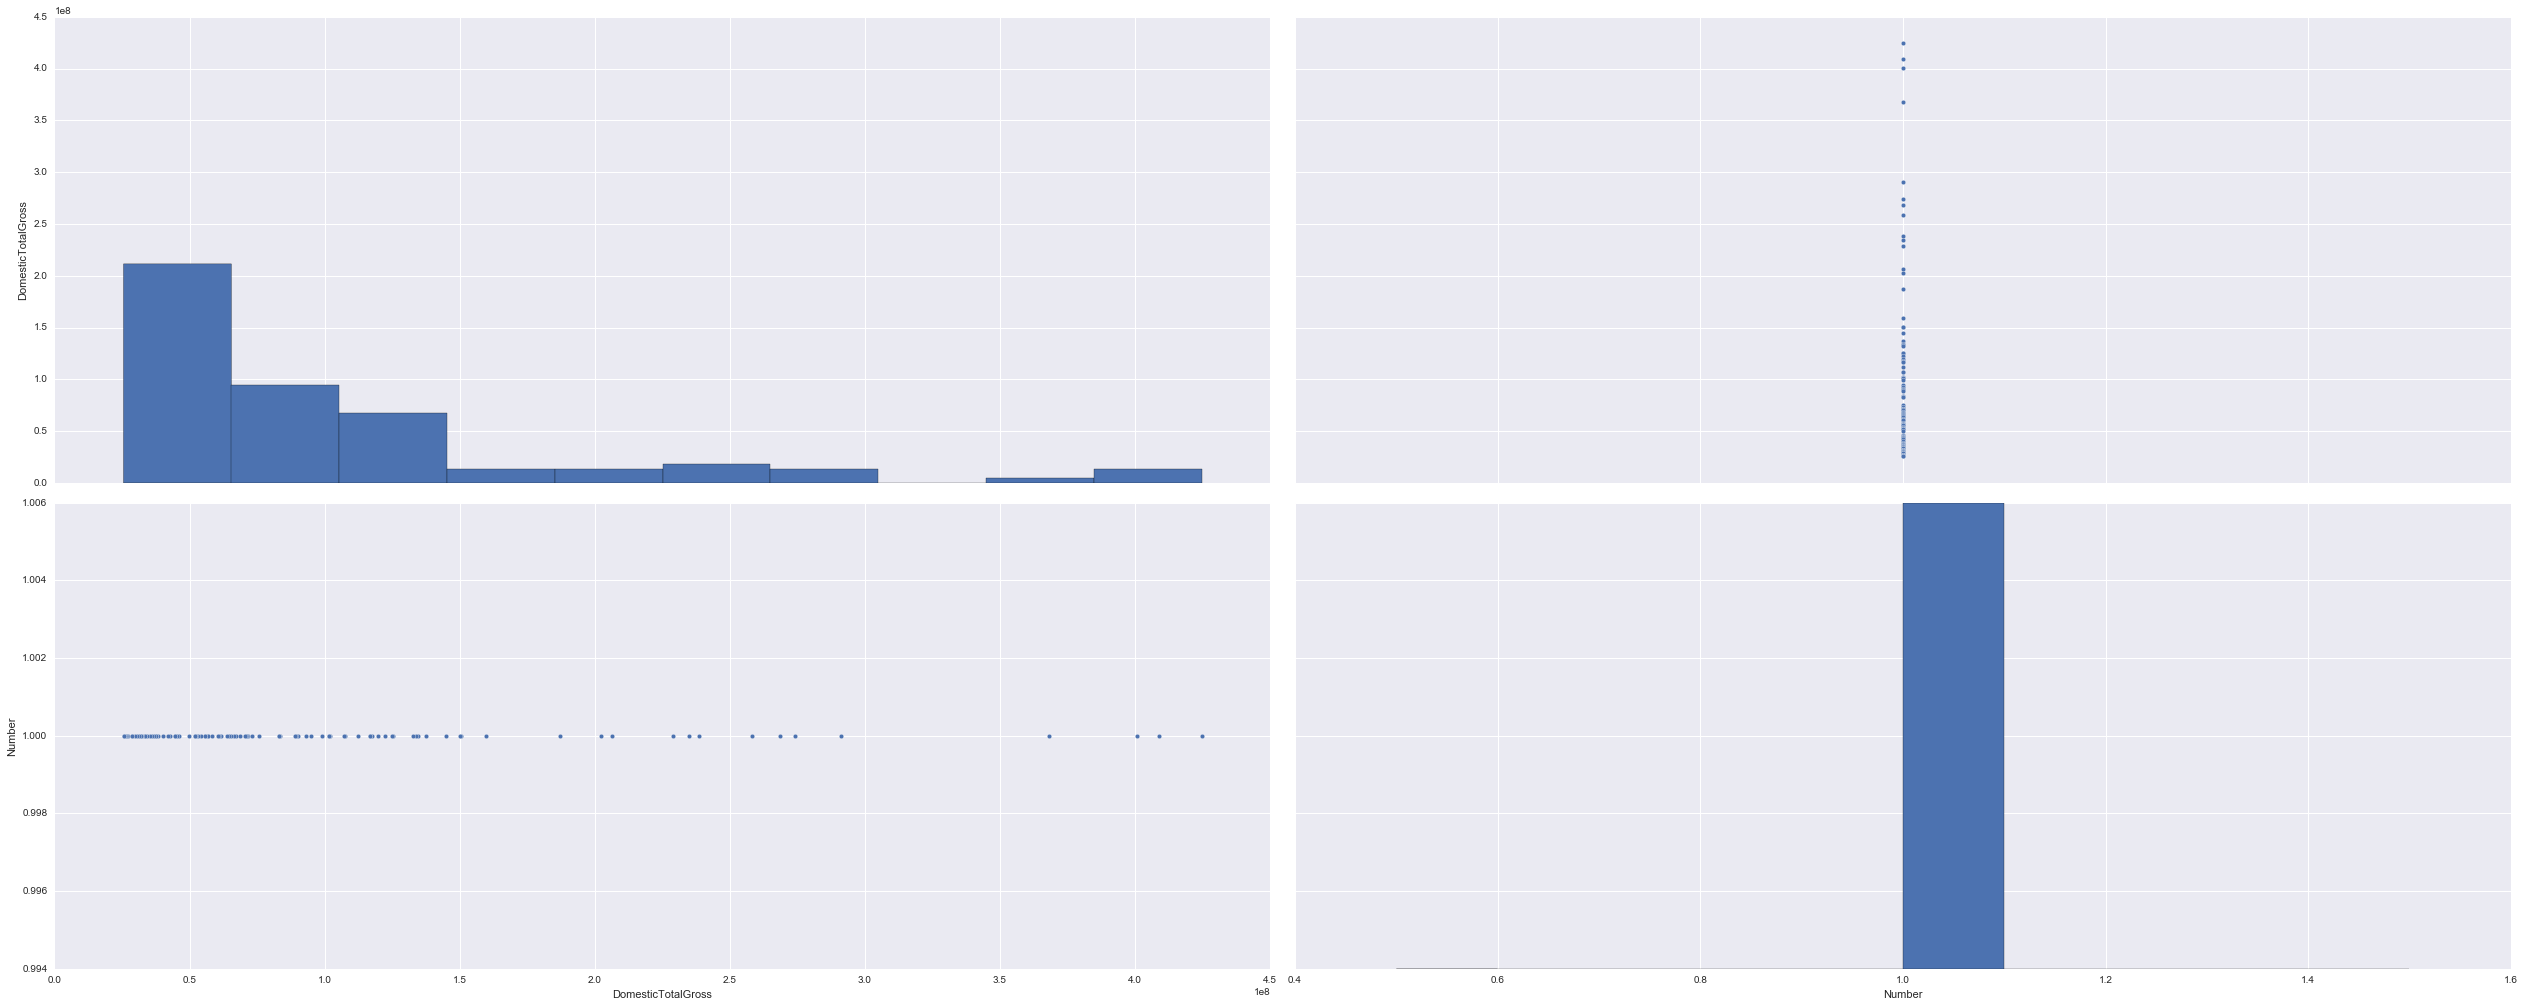

In [5]:
sns.pairplot(df2, size = 7, aspect=2.5)

In [6]:
y = df2['DomesticTotalGross']
X = df2['Number']

model = sm.OLS(y, X)
fit = model.fit()
ypredict = fit.predict(X)
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Thu, 27 Oct 2016   Prob (F-statistic):                nan
Time:                        05:22:15   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Number      1.006e+08   8.74e+06     11.510      0.000      8.33e+07  1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

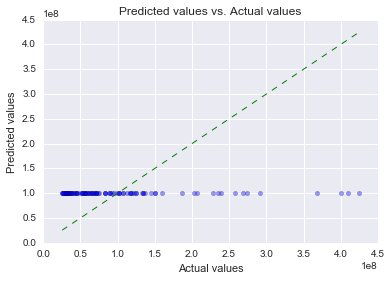

In [7]:
fig, ax = plt.subplots()
ax.scatter(y, ypredict, alpha = 0.4)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'g--', lw=1)
ax.set_title('Predicted values vs. Actual values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.show()

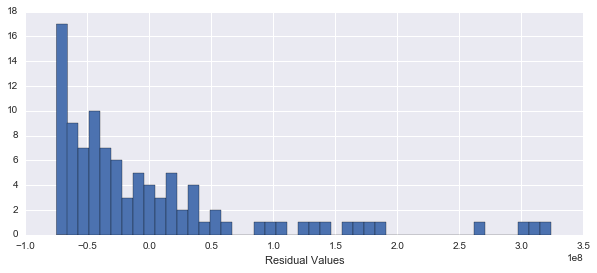

In [8]:
fit.resid.hist(figsize=(10,4), bins=45)
plt.xlabel('Residual Values')

In [17]:
df['Constant'] = 1

df3 = df.dropna()
y2 = df3['DomesticTotalGross']
X2 = df3[['Constant', 'Budget']]

In [20]:
model2 = smf.OLS(y2, X2)
fit2 = model2.fit()
ypredict2 = fit2.predict(X2)
fit2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           1.19e-07
Time:                        05:25:49   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Constant    4.443e+07    1.3e+07      3.418      0.001      1.86e+07  7.03e+07
Budget         0.7831      0.135      5.782      0.000         0.514     1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

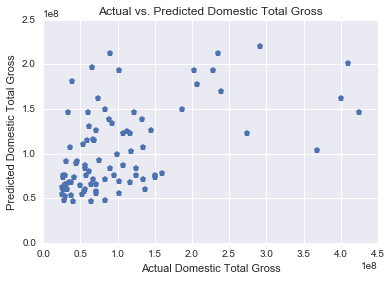

In [22]:
plt.plot(y2, ypredict2, 'p')
plt.xlabel('Real Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Real vs. Predicted Domestic Total Gross');

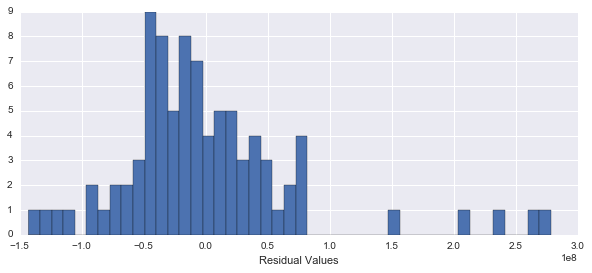

In [23]:
fit2.resid.hist(figsize=(10,4), bins=45)
plt.xlabel('Residual Values')

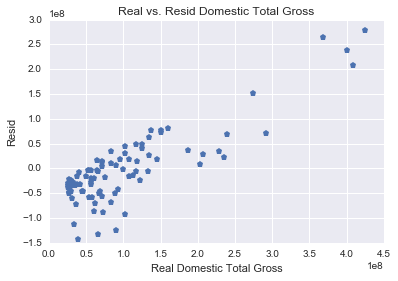

In [29]:
plt.plot(y2, fit2.resid, 'p')
plt.xlabel('Real Domestic Total Gross')
plt.ylabel('Resid')
plt.title('Real vs. Resid Domestic Total Gross');

In [36]:
X3 = df3[['Constant', 'Budget', 'Rating']]
X3 = pd.get_dummies(X3)
model3 = smf.OLS(y2, X3)
fit3 = model3.fit()
ypredict3 = fit3.predict(X3)
fit3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     11.13
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           3.25e-06
Time:                        05:36:13   Log-Likelihood:                -1699.7
No. Observations:                  87   AIC:                             3407.
Df Residuals:                      83   BIC:                             3417.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Constant      3.556e+07   1.13e+07      3.148      0.002      1.31e+07   5.8e+07
Budget           0.7806      0.156      5.005      0.000         0.470     1.091
Rating_PG     2.217e+07   1.68e+07      1.319      0.191     -1.13e+07  5.56e+07
Rating_PG-13  5.061e+06   1.25e+07      0.404      0.687     -1.98e+07     3e+07
Rating_R      8.329e+06   1.19e+07      0.701      0.485     -1.53e+07  3.19e+07
==============================================================================
Omnibus:                       36.518   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.882
Skew:                           1.529   Prob(JB):                     1.66e-18
Kurtosis:                       6.638   Cond. No.                     7.22e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

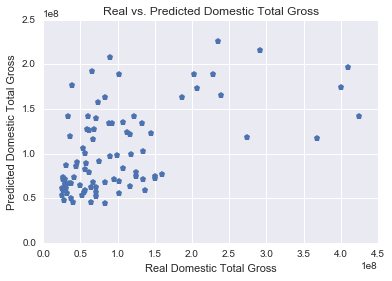

In [37]:
plt.plot(y2, ypredict3, 'p')
plt.xlabel('Real Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Real vs. Predicted Domestic Total Gross');

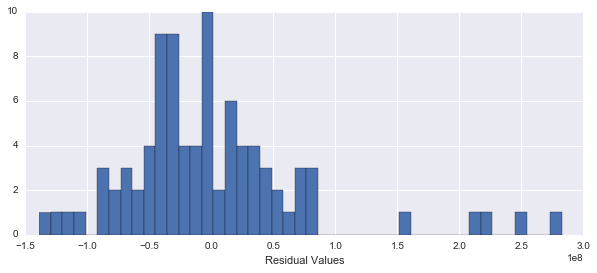

In [38]:
fit3.resid.hist(figsize=(10,4), bins=45)
plt.xlabel('Residual Values')

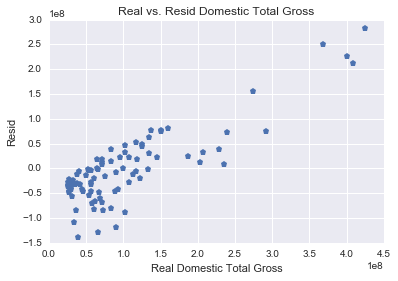

In [39]:
plt.plot(y2, fit3.resid, 'p')
plt.xlabel('Real Domestic Total Gross')
plt.ylabel('Resid')
plt.title('Real vs. Resid Domestic Total Gross');

In [46]:
X4 = df3[['Constant', 'Budget', 'Rating','Runtime']]
X4 = pd.get_dummies(X4)
model4 = smf.OLS(y2, X4)
fit4 = model4.fit()
ypredict4 = fit4.predict(X4)
fit4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     8.730
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           6.38e-06
Time:                        05:42:09   Log-Likelihood:                -1699.0
No. Observations:                  87   AIC:                             3408.
Df Residuals:                      82   BIC:                             3420.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Constant     -1.103e+07   4.13e+07     -0.267      0.790     -9.31e+07  7.11e+07
Budget           0.6957      0.172      4.054      0.000         0.354     1.037
Runtime       6.254e+05   5.33e+05      1.173      0.244     -4.35e+05  1.69e+06
Rating_PG     1.412e+07   1.81e+07      0.779      0.438     -2.19e+07  5.02e+07
Rating_PG-13 -1.335e+07   2.01e+07     -0.666      0.508     -5.33e+07  2.66e+07
Rating_R     -1.179e+07   2.08e+07     -0.566      0.573     -5.32e+07  2.97e+07
==============================================================================
Omnibus:                       35.472   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.021
Skew:                           1.509   Prob(JB):                     3.11e-17
Kurtosis:                       6.445   Cond. No.                     7.10e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

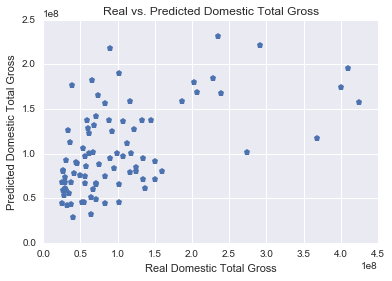

In [60]:
plt.plot(y2, ypredict4, 'p')
plt.xlabel('Real Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Real vs. Predicted Domestic Total Gross');

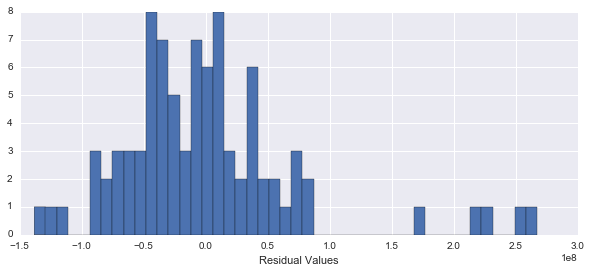

In [48]:
fit4.resid.hist(figsize=(10,4), bins=45)
plt.xlabel('Residual Values')

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X4, y2, test_size=0.25)
model5 = smf.OLS(y_train, X_train)
fit5 = model5.fit()
ypredict5 = fit5.predict(X_test)
fit5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     9.761
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           3.78e-06
Time:                        05:53:19   Log-Likelihood:                -1265.8
No. Observations:                  65   AIC:                             2542.
Df Residuals:                      60   BIC:                             2553.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Constant     -1.966e+07   4.99e+07     -0.394      0.695     -1.19e+08  8.02e+07
Budget           0.9501      0.208      4.571      0.000         0.534     1.366
Runtime       5.933e+05   6.56e+05      0.905      0.369     -7.19e+05  1.91e+06
Rating_PG    -1.039e+07   2.06e+07     -0.505      0.615     -5.15e+07  3.07e+07
Rating_PG-13 -6.863e+06   2.31e+07     -0.296      0.768     -5.32e+07  3.94e+07
Rating_R     -2.414e+06   2.44e+07     -0.099      0.922     -5.13e+07  4.64e+07
==============================================================================
Omnibus:                       32.868   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.349
Skew:                           1.628   Prob(JB):                     4.35e-17
Kurtosis:                       7.150   Cond. No.                     8.13e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.28e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

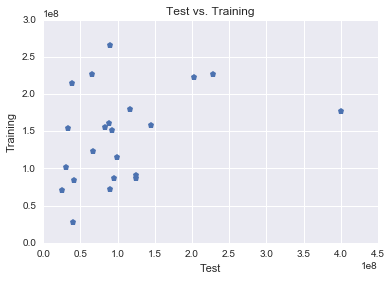

In [72]:
plt.plot(y_test,ypredict5, 'p')
plt.xlabel('Test')
plt.ylabel('Training')
plt.title('Test vs. Training');